# Introduction to Statsmodels

[*`statsmodels`*](https://www.statsmodels.org/stable/index.html) is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. An extensive list of result statistics are available for each estimator. The results are tested against existing statistical packages to ensure that they are correct. 

As its name implies, [*`statsmodels`*](https://www.statsmodels.org/stable/index.html) is a Python library built specifically for statistics. Statsmodels is built on top of [NumPy](https://numpy.org/), [SciPy](https://www.scipy.org/), and [matplotlib](https://matplotlib.org/), but it contains more advanced functions for statistical testing and modeling that you won't find in numerical libraries like NumPy or SciPy.

In this Notebook, I will cover:

- Introduction to Statsmodel
- ETS Decomposition
- Moving Averages
- Holt Winters Methods

## Time Series
A time series is a collection of observations of well-defined data items obtained through repeated measurements over time. For example, measuring the value of retail sales each month of the year would comprise a time series.

In describing these time series, we use words such as “trend” and “seasonal” which need to be defined more carefully:

### Trend
A trend exists when there is a long-term increase or decrease in the data. It does not have to be linear.A trend can be positive or negative depending on whether the time series exhibits an increasing long term pattern or a decreasing long term pattern.If a time series does not show an increasing or decreasing pattern then the series is stationary in the
mean.


![alt text](MSFT2.png "Title")
<p style="text-align: center;"><em><strong>Fig1</strong></em>:Upward Trend for MSFT </p>






### Seasonality
Seasonality occurs when the time series exhibits regular fluctuations during the same month (or months)
every year, or during the same quarter every year. For instance, [retail sales](https://trends.google.com/trends/explore?date=today%205-y&geo=US&q=deals) peak during the month of December.

![alt text](Season.png "Title")
<p style="text-align: center;"><em><strong>Fig2</strong></em>:Seasonal Component for Search for Taxes </p>

### Cyclic
A cycle occurs when the data exhibit rises and falls that are not of a fixed frequency. These fluctuations are usually due to economic conditions, and are often related to the “business cycle”. The duration of these fluctuations is usually at least 2 years. <br><br>
Many people confuse cyclic behaviour with seasonal behaviour, but they are really quite different. If the fluctuations are not of a fixed frequency then they are cyclic; if the frequency is unchanging and associated with some aspect of the calendar, then the pattern is seasonal.

![alt text](sp500.png "Title")
<p style="text-align: center;"><em><strong>Fig3</strong></em>:SP500 Trends with no set repetition </p>







### Perform standard imports and load the dataset
We will use a simple [Hodrick-Prescott filter](https://en.wikipedia.org/wiki/Hodrick%E2%80%93Prescott_filter) that seperates timeseries y_t into trend component 𝜏_t and cyclical component c_t.

<p style="text-align: center;"><em>y_t = 𝜏_t + c_t </em></p>

where:

- y_t: Economic Variable in value at time
- 𝜏_t: Growth Component
- c_t: Cyclical Component

The components are determined by minimizing the following quadratic loss function, where $\lambda$ is a smoothing parameter:<br><br>

<center>$\min_{\\{ \tau_{t}\\} }\sum_{t=1}^{T}c_{t}^{2}+\lambda\sum_{t=1}^{T}\left[\left(\tau_{t}-\tau_{t-1}\right)-\left(\tau_{t-1}-\tau_{t-2}\right)\right]^{2}$</center>


The $\lambda$ value above handles variations in the growth rate of the trend component.<br>When analyzing quarterly data, the default lambda value of 1600 is recommended. Use 6.25 for annual data, and 129,600 for monthly data.


In simple terms, the Hodrick-Prescott filter is de-trending. It is used to obtain a smoothed-curve representation of a time series, one that is more sensitive to long-term than to short-term fluctuations. The adjustment of the sensitivity of the trend to short-term fluctuations is achieved by modifying a multiplier ƛ. <br><br>Don't worry too much about the maths behind it, this is an example to show decompostion of time series and familirizing with statsmodels function. The minimization problem above uses complicated matrix algebra(involving pentadiagonal matrices). I am using this method as a driver, not as a mechanic, don't get caught up with the under the hood maths.


#### Importing Data
For these exercises we'll be using a statsmodels built-in macroeconomics dataset:

In [66]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
df = sm.datasets.macrodata.load_pandas().data
df.index = pd.Index(sm.tsa.datetools.dates_from_range('1959Q1', '2009Q3'))
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


Data Dictionary for the Dataset:

<pre><strong>US Macroeconomic Data for 1959Q1 - 2009Q3</strong>
Number of Observations - 203
Number of Variables - 14
Variable name definitions:
    year      - 1959q1 - 2009q3
    quarter   - 1-4
    realgdp   - Real gross domestic product (Bil. of chained 2005 US$,
                seasonally adjusted annual rate)
    realcons  - Real personal consumption expenditures (Bil. of chained
                2005 US$, seasonally adjusted annual rate)
    realinv   - Real gross private domestic investment (Bil. of chained
                2005 US$, seasonally adjusted annual rate)
    realgovt  - Real federal consumption expenditures & gross investment
                (Bil. of chained 2005 US$, seasonally adjusted annual rate)
    realdpi   - Real private disposable income (Bil. of chained 2005
                US$, seasonally adjusted annual rate)
    cpi       - End of the quarter consumer price index for all urban
                consumers: all items (1982-84 = 100, seasonally adjusted).
    m1        - End of the quarter M1 nominal money stock (Seasonally
                adjusted)
    tbilrate  - Quarterly monthly average of the monthly 3-month
                treasury bill: secondary market rate
    unemp     - Seasonally adjusted unemployment rate (%)
    pop       - End of the quarter total population: all ages incl. armed
                forces over seas
    infl      - Inflation rate (ln(cpi_{t}/cpi_{t-1}) * 400)
    realint   - Real interest rate (tbilrate - infl)</pre>
    

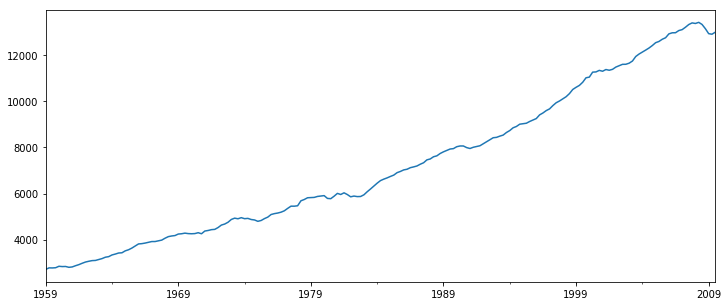

In [67]:
ax = df['realgdp'].plot(figsize = (12,5))
ax.autoscale(axis='x',tight=True)


#### Using Statsmodels to get the trend
We will use [statsmodels.tsa.filters.hp_filter.hpfilter](https://www.statsmodels.org/stable/generated/statsmodels.tsa.filters.hp_filter.hpfilter.html)(X, lamb=1600) to extract trend and cyclical trend. The function will return a tuple, with cycle on it's first index and trend on the second. We will use tuple unpacking to extract the values.

In [68]:
df['cycle'], df['Trend'] = sm.tsa.filters.hpfilter(df['realgdp'],lamb=1600) #recommended value for Quaterly time series


In [69]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint,cycle,Trend
1959-03-31,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00,39.511915,2670.837085
1959-06-30,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74,80.088532,2698.712468
1959-09-30,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09,48.875455,2726.612545
1959-12-31,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06,30.591933,2754.612067
1960-03-31,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19,64.882667,2782.816333


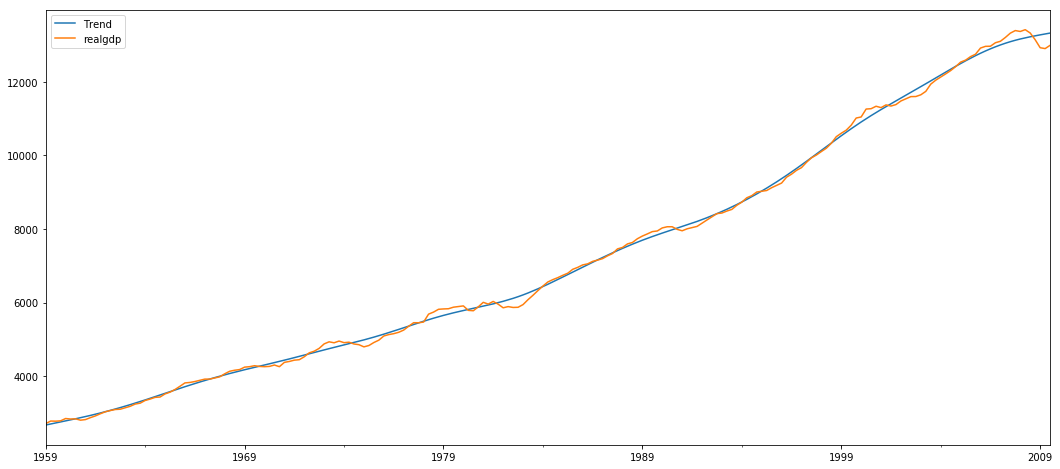

In [70]:
df[['Trend','realgdp']].plot(figsize = (18,8)).autoscale(axis='x',tight=True);

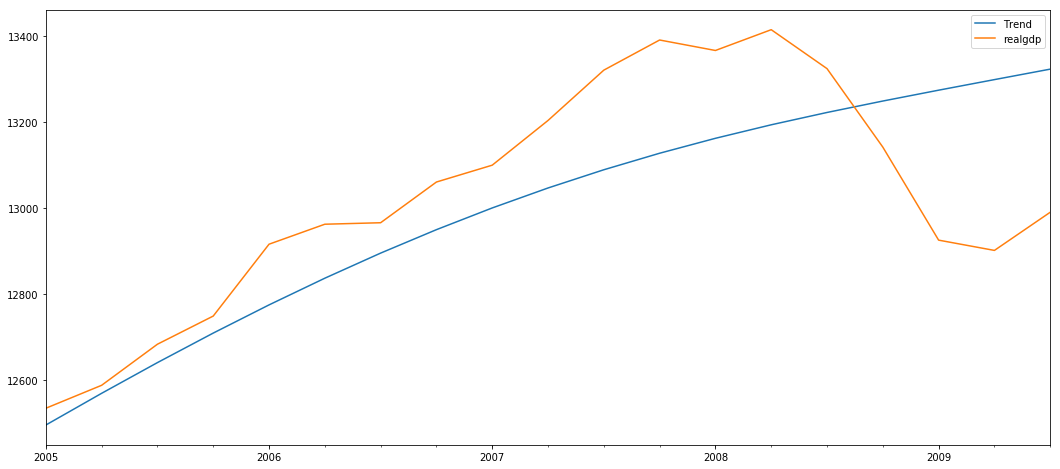

In [71]:
#2008 crisis, the trend and gdp diverged
df[['Trend','realgdp']].loc['2005-01-01':].plot(figsize = (18,8)).autoscale(axis='x',tight=True);

## ETS(Error-Trend-Seasonality) Models

- Exponential Smoothing
- Trend Methods Models
- ETS Decomposition

Collectively, the methods are sometimes referred to as ETS models, referring to the explicit modeling of Error, Trend and Seasonality.

`statsmodels` uses `endog` and `exog` as names of data,the observed variable that are used in our time series:

- `endogenous`: caused by factors within the system. It designates variables in an economic/econometric model that are explained, or predicted, by that model.It can be thought as y_t

- `exogenous` : caused by factors outside the system. It designates variables that appear in an economic/econometric model, but are not explained by that model. It can be thought as x_t

As we start to work with endogenous(y_t), it is critical to indentify and isolate factors that influence behavior. ETS(Error-Trend-Seasonality) Models will take each of those terms for "smoothing" and may add them, multiply them, or leave them out.

### Decomposition

[`Decomposition`](https://otexts.com/fpp2/decomposition.html) of a time series attempts to isolate componets such as error, trend and seasonality. Statsmodels provides a [seasonal decomposition tool](https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html) we can use to separate out the different components. This lets us see quickly and visually what each component contributes to the overall behavior.The seasonal component is first removed by applying a convolution filter to the data. The average of this smoothed series for each period is the returned seasonal component.

**Note** : This is a naive decomposition. More sophisticated methods should be preferred.


We apply an **additive model** when it seems that the trend is more linear and the seasonality and trend components seem to be constant over time.

A **multiplicative model** is more appropriate when we are increasing (or decreasing) at a non-linear rate (e.g. each year we double the amount of passengers). 







In [72]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
airline = pd.read_csv('airline_passengers.csv',index_col=0,parse_dates=True)
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [73]:
#Decompostion does not work if dataset contains null/NaN values

airline.dropna(inplace = True)

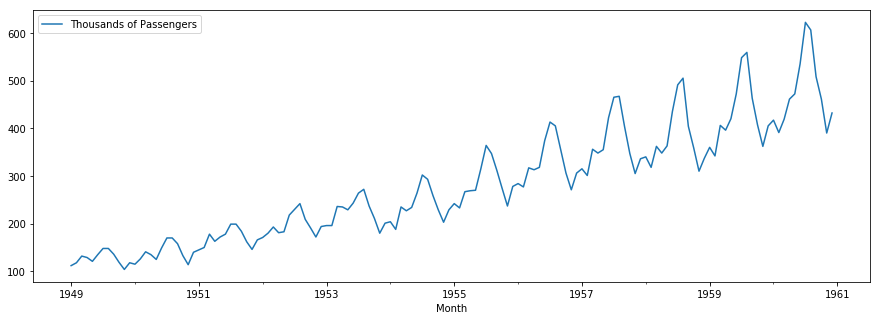

In [74]:
airline.plot(figsize = (15,5))

We will use [`seasonal_decompose`](https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html),where important parameters are:

- `x` : Time series
- `model` : {“additive”, “multiplicative”} 
- `period` : Use only if the time series is not defined as index of pandas object, or the index does not have set [frequency](https://stackoverflow.com/questions/23003486/frequency-of-a-data-frame)

This returns an statsmodels object with seasonal, trend, and resid attributes.

In [75]:
result = sm.tsa.seasonal_decompose(airline['Thousands of Passengers'],model='multiplicative')

In [76]:
type(result)

statsmodels.tsa.seasonal.DecomposeResult

In [77]:
#we can individually access the object using dot operator
print("No of observation {}".format(result.nobs))
print("\n\n5 observation:\n{}".format(result.observed[:5]))
print("\n\n5 Seasonal Index:\n{}".format(result.seasonal[:5]))

#so on

No of observation 144


5 observation:
Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: Thousands of Passengers, dtype: int64


5 Seasonal Index:
Month
1949-01-01    0.910230
1949-02-01    0.883625
1949-03-01    1.007366
1949-04-01    0.975906
1949-05-01    0.981378
Name: Thousands of Passengers, dtype: float64


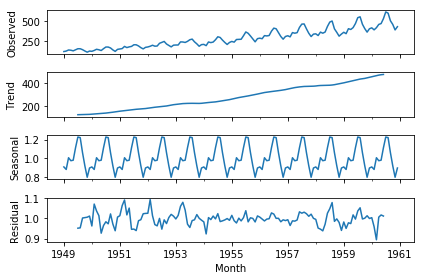

In [78]:
#we can visulaize the deconposition
result.plot();

## Exponentially Weighted Moving Average(EWMA Models)

Forecasts produced using exponential smoothing methods are weighted averages of past observations, with the weights decaying exponentially as the observations get older. In other words, the more recent the observation the higher the associated weight. 

We will start with `Simple Moving Average(SMA)` and then expand the same to `Exponentially Weighted Moving Average(EWMA)`.

### Simple Moving Average
SMA is the unweighted mean of previous n data. Mathamtically MA of order *m*:

<center> $${\hat{y_t} = \frac{1}{m}}{\displaystyle\sum\limits_{i=-k}^k y_{t+j}}$$ </center>

where m = 2*k*+1 <br><br>
The estimate at time *t* is obtained by averaging value of the time series within k periods of *t*.The average eliminates some of the randomness in the data, leaving a smooth trend-cycle component. We call this an *m*-MA, meaning a moving average of order *m*.

We will use [`rolling`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) method.The `window` parameter will define the *m* of the estimate. Check out the documentation for more parameters.

In [79]:
airline['6-month-SMA'] = airline['Thousands of Passengers'].rolling(window = 6).mean()
airline['12-month-SMA'] = airline['Thousands of Passengers'].rolling(window = 12).mean()
airline.head(15)

,Thousands of Passengers,6-month-SMA,12-month-SMA
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,NaN,NaN
1949-04-01,129,NaN,NaN
1949-05-01,121,NaN,NaN
1949-06-01,135,124.500000,NaN
1949-07-01,148,130.500000,NaN
1949-08-01,148,135.500000,NaN
1949-09-01,136,136.166667,NaN


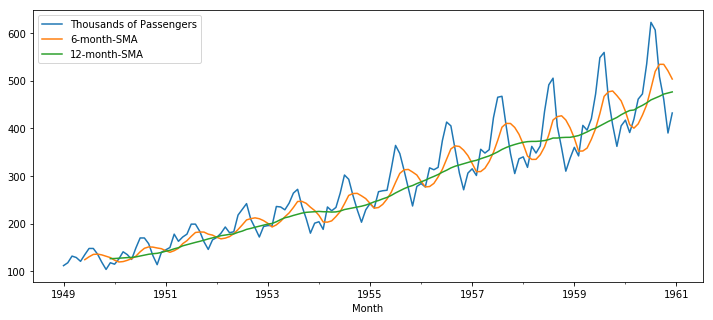

In [80]:
airline.plot(figsize = (12,5));

### Exponentially Weighted Moving Average
SMA has some weakness:

- Window(*m*) might have noise
- SMA overlooks complex relationships
- Signal lags by the size of the window
- Won't capture the peaks due to average
- Informs about the future trend, not future behavior. For this reason, it is used in trading to capture the trend of a stock.
- Extreme historical values can skew your SMA significantly

To alleviate some of the issue, we can use EWMA. EWMA is a weighted sum of past observations, but the model explicitly uses an exponentially decreasing weight for past observations, this helps reduce the lag effect from SMA. The amount of weight can be controlled or nature controlled by the parameter in the function.

The formula for EWMA is:
### <center>$y_t =   \frac{\sum\limits_{i=0}^t w_i x_{t-i}}{\sum\limits_{i=0}^t w_i}$</center>

Where $x_t$ is the input(exog), $w_i$ is the applied weight, and $y_t$(endog) is the output.

$w_i$ can be adjusted using parameter in <tt>[.ewm()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html)</tt> method. 

When <tt>adjust=True</tt> (default) is used, weighted averages are calculated using weights equal to $w_i = (1 - \alpha)^i$

which gives

### $y_t = \frac{x_t + (1 - \alpha)x_{t-1} + (1 - \alpha)^2 x_{t-2} + ...
+ (1 - \alpha)^t x_{0}}{1 + (1 - \alpha) + (1 - \alpha)^2 + ...
+ (1 - \alpha)^t}$

When <tt>adjust=False</tt> is specified, moving averages are calculated as:

### $\begin{split}y_0 &= x_0 \\
y_t &= (1 - \alpha) y_{t-1} + \alpha x_t,\end{split}$

which is equivalent to using weights:

 \begin{split}w_i = \begin{cases}
    \alpha (1 - \alpha)^i & \text{if } i < t \\
    (1 - \alpha)^i        & \text{if } i = t.
\end{cases}\end{split}


For an infinite series, both the values will be same.


When <tt>adjust=True</tt> we have $y_0=x_0$ and from the last representation above we have 
$y_t=\alpha x_t+(1−α)y_{t−1}$, therefore there is an assumption that $x_0$ is not an ordinary value but rather an exponentially weighted moment of the infinite series up to that point.

For the smoothing factor $\alpha$ one must have $0<\alpha≤1$, and while it is possible to pass <em>alpha</em> directly. Tha value of $\alpha$ can be defined in following ways:

\begin{split}\alpha =
 \begin{cases}
     \frac{2}{s + 1},               & \text{for span}\ s \geq 1\\
     \frac{1}{1 + c},               & \text{for center of mass}\ c \geq 0\\
     1 - \exp^{\frac{\log 0.5}{h}}, & \text{for half-life}\ h > 0
 \end{cases}\end{split}

* <strong>Span</strong> corresponds to what is commonly called an “N-day EW moving average”.
* <strong>Center of mass</strong> has a more physical interpretation and can be thought of in terms of span: $c=(s−1)/2$
* <strong>Half-life</strong> is the period of time for the exponential weight to reduce to one half.
* <strong>Alpha</strong> specifies the smoothing factor directly.

We have to pass precisely one of the above into the <tt>.ewm()</tt> function. For our data we'll use <tt>span=12</tt>.

In [81]:
airline['EWMA12'] = airline['Thousands of Passengers'].ewm(span=12,adjust=False).mean()

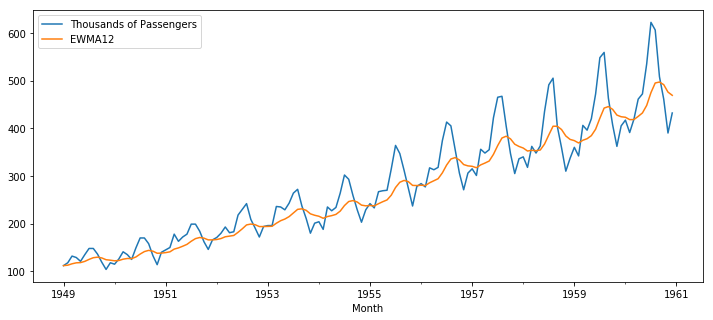

In [82]:
airline[['Thousands of Passengers','EWMA12']].plot(figsize = (12,5));

### Comparing SMA and EWMA

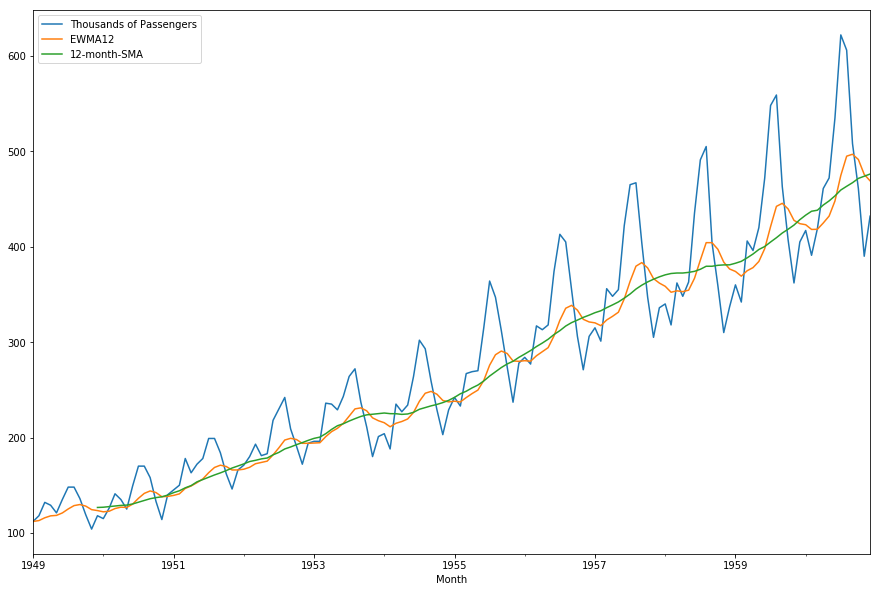

In [83]:
airline[['Thousands of Passengers','EWMA12','12-month-SMA']].plot(figsize=(15,10)).autoscale(axis='x',tight=True);

## Holt-Winters Methods

Exponential Smoothing is a time series forecasting method for univariate data, that can be extended to support data which has trend & seasonal components.

Exponential smoothing forecasting methods are similar in that a prediction is a weighted sum of past observations, but the model explicitly uses an exponentially decreasing weight for past observations. Specifically, past observations are weighted with a geometrically decreasing ratio.

In the previous section on Exponentially Weighted Moving Averages (EWMA) we applied Simple Exponential Smoothing using just one smoothing factor  𝛼  (alpha). This failed to account for other contributing factors like trend and seasonality.

In <strong>Double Exponential Smoothing</strong> (aka Holt's Method) we introduce a new smoothing factor $\beta$ (beta) that addresses trend:

\begin{split}l_t &= (1 - \alpha) l_{t-1} + \alpha x_t, & \text{    level}\\
b_t &= (1-\beta)b_{t-1} + \beta(l_t-l_{t-1}) & \text{    trend}\\
y_t &= l_t + b_t & \text{    fitted model}\\
\hat y_{t+h} &= l_t + hb_t & \text{    forecasting model (} h = \text{# periods into the future)}\end{split}

This model only considers level and trend. The model will output a simple straight slope line.In addition to the alpha parameter for controlling smoothing factor for the level, an additional smoothing factor is added to control the decay of the influence of the change in trend called beta (β).

With <strong>Triple Exponential Smoothing</strong> (aka the Holt-Winters Method) we introduce a smoothing factor $\gamma$ (gamma) that addresses seasonality:

\begin{split}l_t &= (1 - \alpha) l_{t-1} + \alpha x_t, & \text{    level}\\
b_t &= (1-\beta)b_{t-1} + \beta(l_t-l_{t-1}) & \text{    trend}\\
c_t &= (1-\gamma)c_{t-L} + \gamma(x_t-l_{t-1}-b_{t-1}) & \text{    seasonal}\\
y_t &= (l_t + b_t) c_t & \text{    fitted model}\\
\hat y_{t+m} &= (l_t + mb_t)c_{t-L+1+(m-1)modL} & \text{    forecasting model (} m = \text{# periods into the future)}\end{split}

Triple Exponential Smoothing is an extension of Double Exponential Smoothing that explicitly adds support for seasonality to the univariate time series. This method is sometimes called Holt-Winters Exponential Smoothing, named for two contributors to the method: Charles Holt and Peter Winters. In addition to the alpha and beta smoothing factors, a new parameter is added called gamma (γ) that controls the influence on the seasonal component.

Functions used:

- **[sm.tsa.SimpleExpSmoothing](https://www.statsmodels.org/stable/generated/statsmodels.tsa.holtwinters.SimpleExpSmoothing.html)**


### Simple Exponential Smoothing using Statsmodels
Simple Exponential Smoothing, is a time series forecasting method for univariate data which does not consider the trend and seasonality in the input data while forecasting. The prediction is just the weighted sum of past observations.
It requires a single parameter, called alpha (α), also called the smoothing factor.

This was discussed in last section. We will be repeating this using statsmodels library.

<center>$\begin{split}y_0 &= x_0 \\
y_t &= (1 - \alpha) y_{t-1} + \alpha x_t,\end{split}$</center>

In [84]:
#data check
airline.head()

,Thousands of Passengers,6-month-SMA,12-month-SMA,EWMA12
Month,,,,
1949-01-01,112,NaN,NaN,112.000000
1949-02-01,118,NaN,NaN,112.923077
1949-03-01,132,NaN,NaN,115.857988
1949-04-01,129,NaN,NaN,117.879836
1949-05-01,121,NaN,NaN,118.359861


In [85]:
#Step1: Run the model
model = sm.tsa.SimpleExpSmoothing(airline['Thousands of Passengers']) #pass the endogs
model
#warning generated

C:\Users\arao1\AppData\Local\Continuum\anaconda3\envs\virtual_env_tsa\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


**The index does not have a frequency set. We can check this by accessing the index of dataframe. statsmodels requires index to have a frequency, otherwiswe defaults to 'MS' (start of month). You can specify the frequecy alias using this [table](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)**

In [86]:
airline.index
# freq parameter here is none

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [87]:
#frequency alias for start of month is 'MS'
airline.index.freq = 'MS'

In [88]:
#fixed
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [89]:
#let's try it again
#Step1: Run the model
model = sm.tsa.SimpleExpSmoothing(airline['Thousands of Passengers']) #pass the endogs
model
# model object initalized

In [90]:
#model needs to tuned, you can access different attributes and functions using dot operator
#We will now fit the model, we can let the library choose the alpha value or pass it manually. 
#For sake of exercise I will pass it myself

span = 12 #discussed in .ewm() section
alpha = 2/(span+1) #discussed in .ewm() section

#manual passing of alpha, requires optimized to be set to False
fit_model = model.fit(smoothing_level=alpha,optimized=False)


#model is fitted with values
fit_model

In [91]:
airline['SES12']=fit_model.fittedvalues.shift(-1) # we have to shift the postion of fitted value by 1

In [92]:
airline.head() #EWMA12 and SES12 is same, as expected

,Thousands of Passengers,6-month-SMA,12-month-SMA,EWMA12,SES12
Month,,,,,
1949-01-01,112,NaN,NaN,112.000000,112.000000
1949-02-01,118,NaN,NaN,112.923077,112.923077
1949-03-01,132,NaN,NaN,115.857988,115.857988
1949-04-01,129,NaN,NaN,117.879836,117.879836
1949-05-01,121,NaN,NaN,118.359861,118.359861


In [93]:
#usually the above steps are consolidated in one step
airline.drop('SES12',axis = 1,inplace = True)
airline['SES12']=sm.tsa.SimpleExpSmoothing(airline['Thousands of Passengers']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)
airline.head()

,Thousands of Passengers,6-month-SMA,12-month-SMA,EWMA12,SES12
Month,,,,,
1949-01-01,112,NaN,NaN,112.000000,112.000000
1949-02-01,118,NaN,NaN,112.923077,112.923077
1949-03-01,132,NaN,NaN,115.857988,115.857988
1949-04-01,129,NaN,NaN,117.879836,117.879836
1949-05-01,121,NaN,NaN,118.359861,118.359861


## Double Exponential smoothing
Double Exponential Smoothing is an extension to Simple Exponential Smoothing that explicitly adds support for trends in the univariate time series. In addition to the alpha parameter for controlling smoothing factor for the level, an additional smoothing factor is added to control the decay of the influence of the change in trend called beta (β).The method supports trends that change in different ways: an additive and a multiplicative, depending on whether the trend is linear or exponential respectively.

Double Exponential Smoothing with an additive trend is classically referred to as Holt’s linear trend model.

**Additive Seasonality** - Double Exponential Smoothing with a linear trend.<br>
**Multiplicative Seasonality** - Double Exponential Smoothing with an exponential trend

As we move toward forecasting, it's worth noting that both additive and multiplicative adjustments may become exaggerated over time, and require damping that reduces the size of the trend over future periods until it reaches a flat line.


In [94]:
airline['DESadd12'] = sm.tsa.ExponentialSmoothing(airline['Thousands of Passengers'],trend='add').fit().fittedvalues.shift(-1)
airline.head()

,Thousands of Passengers,6-month-SMA,12-month-SMA,EWMA12,SES12,DESadd12
Month,,,,,,
1949-01-01,112,NaN,NaN,112.000000,112.000000,114.336774
1949-02-01,118,NaN,NaN,112.923077,112.923077,120.336774
1949-03-01,132,NaN,NaN,115.857988,115.857988,134.336774
1949-04-01,129,NaN,NaN,117.879836,117.879836,131.336774
1949-05-01,121,NaN,NaN,118.359861,118.359861,123.336774


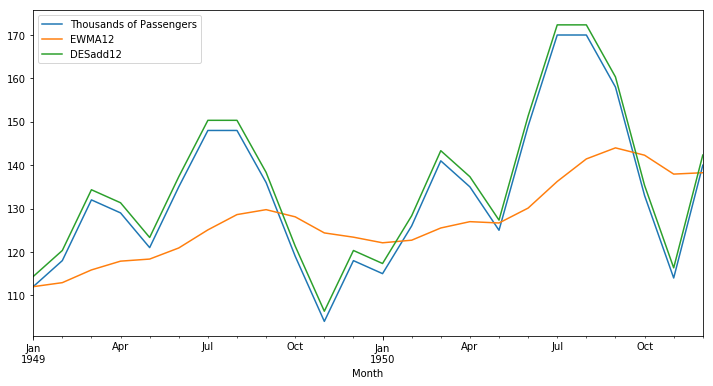

In [95]:
airline[['Thousands of Passengers','EWMA12','DESadd12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

Here we can see that Double Exponential Smoothing is a much better representation of the time series data.
Let's see if using a multiplicative seasonal adjustment helps.

In [96]:
airline['DESmul12'] = sm.tsa.ExponentialSmoothing(airline['Thousands of Passengers'],trend='mul').fit().fittedvalues.shift(-1)
airline.head()

,Thousands of Passengers,6-month-SMA,12-month-SMA,EWMA12,SES12,DESadd12,DESmul12
Month,,,,,,,
1949-01-01,112,NaN,NaN,112.000000,112.000000,114.336774,112.049247
1949-02-01,118,NaN,NaN,112.923077,112.923077,120.336774,118.051885
1949-03-01,132,NaN,NaN,115.857988,115.857988,134.336774,132.058041
1949-04-01,129,NaN,NaN,117.879836,117.879836,131.336774,129.056722
1949-05-01,121,NaN,NaN,118.359861,118.359861,123.336774,121.053204


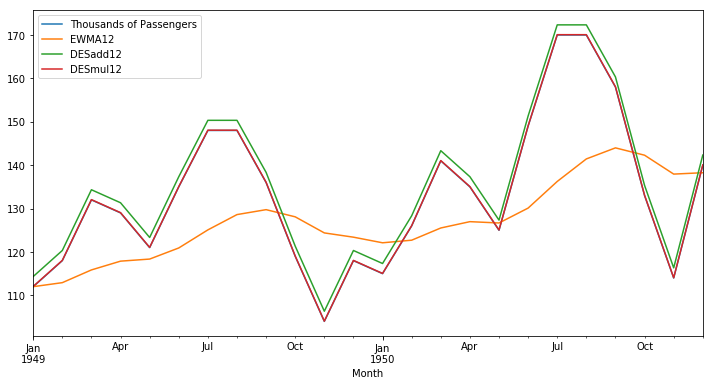

In [97]:
airline[['Thousands of Passengers','EWMA12','DESadd12','DESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

Although minor, it does appear that a multiplicative adjustment gives better results. Note that the green line almost completely overlaps the original data.

## Triple Exponential Smoothing

Triple Exponential Smoothing is an extension of Double Exponential Smoothing that explicitly adds support for seasonality to the univariate time series.In addition to the alpha and beta smoothing factors, a new parameter is added called gamma (γ) that controls the influence on the seasonal component.

**hyperparameters**:
- Alpha: Smoothing factor for the level.
- Beta: Smoothing factor for the trend.
- Gamma: Smoothing factor for the seasonality.
- Trend Type: Additive or multiplicative.
- Seasonality Type: Additive or multiplicative.
- Period: Time steps in seasonal period.


**Additive Seasonality** - Triple Exponential Smoothing with a linear seasonality.<br>
**Multiplicative Seasonality** - Triple Exponential Smoothing with an exponential seasonality

Functions used:<br>
-**[sm.tsa.ExponentialSmoothing](https://www.statsmodels.org/stable/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.html)**



In [98]:
#addtive trend and seasonality
airline['TESadd12'] = sm.tsa.ExponentialSmoothing(airline['Thousands of Passengers'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
airline.head()

,Thousands of Passengers,6-month-SMA,12-month-SMA,EWMA12,SES12,DESadd12,DESmul12,TESadd12
Month,,,,,,,,
1949-01-01,112,NaN,NaN,112.000000,112.000000,114.336774,112.049247,113.081280
1949-02-01,118,NaN,NaN,112.923077,112.923077,120.336774,118.051885,120.550730
1949-03-01,132,NaN,NaN,115.857988,115.857988,134.336774,132.058041,135.527373
1949-04-01,129,NaN,NaN,117.879836,117.879836,131.336774,129.056722,133.155127
1949-05-01,121,NaN,NaN,118.359861,118.359861,123.336774,121.053204,125.656203


In [99]:
#multiplicative trend and seasonality
airline['TESmul12'] = sm.tsa.ExponentialSmoothing(airline['Thousands of Passengers'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
airline.head()

,Thousands of Passengers,6-month-SMA,12-month-SMA,EWMA12,SES12,DESadd12,DESmul12,TESadd12,TESmul12
Month,,,,,,,,,
1949-01-01,112,NaN,NaN,112.000000,112.000000,114.336774,112.049247,113.081280,113.081280
1949-02-01,118,NaN,NaN,112.923077,112.923077,120.336774,118.051885,120.550730,120.550730
1949-03-01,132,NaN,NaN,115.857988,115.857988,134.336774,132.058041,135.527373,135.527373
1949-04-01,129,NaN,NaN,117.879836,117.879836,131.336774,129.056722,133.155127,133.155127
1949-05-01,121,NaN,NaN,118.359861,118.359861,123.336774,121.053204,125.656203,125.656203


In [100]:
airline.columns

Index(['Thousands of Passengers', '6-month-SMA', '12-month-SMA', 'EWMA12',
       'SES12', 'DESadd12', 'DESmul12', 'TESadd12', 'TESmul12'],
      dtype='object')

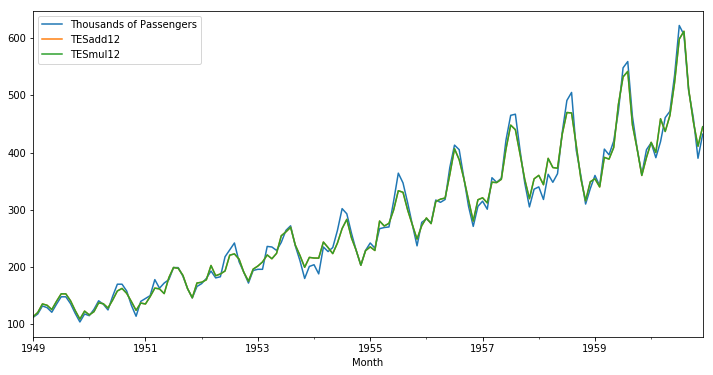

In [101]:
airline[['Thousands of Passengers', 'TESadd12', 'TESmul12']].plot(figsize=(12,6)).autoscale(axis ='x',tight = True)

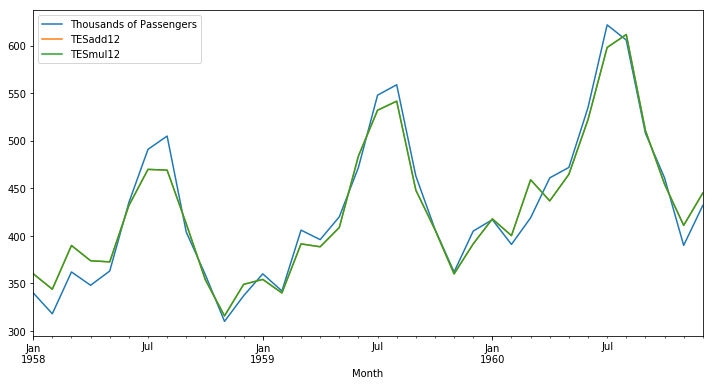

In [102]:
airline[['Thousands of Passengers', 'TESadd12', 'TESmul12']].iloc[-36:].plot(figsize=(12,6)).autoscale(axis ='x',tight = True)

This is not the forecast, based on the visual one might think that Triple exponential smoothining does a poorer job of fitting than Double Exponential Smoothing. We will discuss the metrics to measure forecast in the next section.